In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
num = 1

In [4]:
#train = pd.read_csv('0424new_train_'+str(num)+'.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'.csv')

In [5]:
#train = pd.read_csv('0424new_train_'+str(num)+'bb.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'bb.csv')

In [6]:
#train = pd.read_csv('0424new_train_'+str(num)+'cc.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'cc.csv')

In [7]:
#train = pd.read_csv('0427new_train_'+str(num)+'.csv')
#test = pd.read_csv('0427new_test_'+str(num)+'.csv')

In [8]:
train = pd.read_csv('0503new_train_'+str(num)+'_change.csv')
test = pd.read_csv('0503new_test_'+str(num)+'_change.csv')

In [9]:
#train = pd.read_csv('0504new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0504new_test_'+str(num)+'_change.csv')

In [10]:
#train = pd.read_csv('0505new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0505new_test_'+str(num)+'_change.csv')

In [11]:
#train = pd.read_csv('0424upsample.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'dd.csv')

In [12]:
#train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)
#test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)

In [13]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [14]:
train = shuffle(train)
#test = shuffle(test)

In [15]:
#test

In [16]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [17]:
#train_feature

In [18]:
#test.reset_index( drop=True, inplace=True )
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [19]:
new_all_feature = preprocessing.scale(train_feature)
test_feature  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [20]:
#new_all_feature

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [22]:
model = tf.keras.models.Sequential()

In [23]:
model.add( tf.keras.layers.Dense(units=64, input_shape=[40],            #52,47
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [24]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300

In [25]:
model.add(tf.keras.layers.Dense(units=32,
               kernel_initializer='he_normal',  #he_normal
               kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
               activation='relu'))   #relu

In [26]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [27]:
#model.add(tf.keras.layers.Dense(units=32,
#               kernel_initializer='he_normal',  #he_normal
#               kernel_regularizer= regularizers.l2(0.07),   #0.06  #0.07
##               kernel_regularizer= regularizers.l1_l2(0.07),           
##               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
#               activation='relu'))   #relu

In [28]:
#model.add(tf.keras.layers.Dropout(0.2))  #ep 100

In [29]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [30]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )
#adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [31]:
#sgd = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.01, nesterov=False)

In [32]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
#model.compile( optimizer = sgd , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
train_history = model.fit(new_all_feature , train_y,  
                          epochs = 50, batch_size = 15, verbose=2)   #一層500  三層1500 #15  #150 epoch

Epoch 1/50
 - 0s - loss: 16.5739 - acc: 0.1988
Epoch 2/50
 - 0s - loss: 15.2687 - acc: 0.3216
Epoch 3/50
 - 0s - loss: 14.0104 - acc: 0.3977
Epoch 4/50
 - 0s - loss: 12.9673 - acc: 0.3743
Epoch 5/50
 - 0s - loss: 12.0012 - acc: 0.4327
Epoch 6/50
 - 0s - loss: 11.1984 - acc: 0.4444
Epoch 7/50
 - 0s - loss: 10.4158 - acc: 0.4503
Epoch 8/50
 - 0s - loss: 9.7226 - acc: 0.3743
Epoch 9/50
 - 0s - loss: 9.0143 - acc: 0.4620
Epoch 10/50
 - 0s - loss: 8.3383 - acc: 0.4620
Epoch 11/50
 - 0s - loss: 7.7416 - acc: 0.5088
Epoch 12/50
 - 0s - loss: 7.1051 - acc: 0.5497
Epoch 13/50
 - 0s - loss: 6.6639 - acc: 0.4854
Epoch 14/50
 - 0s - loss: 6.1991 - acc: 0.4795
Epoch 15/50
 - 0s - loss: 5.7659 - acc: 0.5322
Epoch 16/50
 - 0s - loss: 5.3464 - acc: 0.5088
Epoch 17/50
 - 0s - loss: 4.9924 - acc: 0.5439
Epoch 18/50
 - 0s - loss: 4.6450 - acc: 0.5263
Epoch 19/50
 - 0s - loss: 4.3448 - acc: 0.5497
Epoch 20/50
 - 0s - loss: 4.0201 - acc: 0.5789
Epoch 21/50
 - 0s - loss: 3.7771 - acc: 0.6140
Epoch 22/50
 - 

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train):
    plt.plot(train_history.history[train])
    #plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

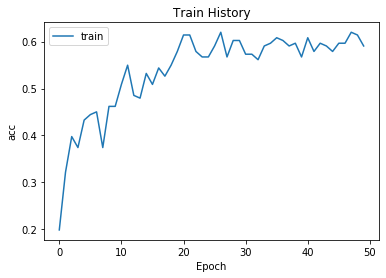

In [36]:
show_train_history(train_history,'acc')

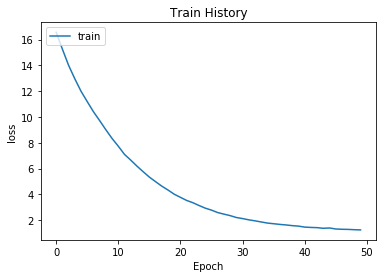

In [37]:
show_train_history(train_history,'loss')

In [38]:
test_out =  model.predict_classes(test_feature)

In [39]:
test_out

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [40]:
prob = model.predict_proba(test_feature)

In [41]:
prob[0:10]

array([[0.5588846 , 0.22875318, 0.12749037, 0.0848719 ],
       [0.5832857 , 0.22369616, 0.1175382 , 0.07547987],
       [0.7203147 , 0.15225989, 0.0740159 , 0.05340957],
       [0.42337596, 0.31942698, 0.16203742, 0.09515963],
       [0.5197677 , 0.24606358, 0.14045413, 0.09371467],
       [0.43154708, 0.27856228, 0.17324841, 0.11664224],
       [0.551309  , 0.22405691, 0.13332593, 0.09130812],
       [0.6530635 , 0.18917888, 0.09438913, 0.06336854],
       [0.5419172 , 0.2472489 , 0.12725943, 0.08357452],
       [0.5525788 , 0.26537496, 0.11425481, 0.06779131]], dtype=float32)

In [42]:
prob[10:16]

array([[0.69227356, 0.17705111, 0.08023452, 0.05044083],
       [0.29417497, 0.4457613 , 0.171517  , 0.08854669],
       [0.4676306 , 0.2865838 , 0.15321484, 0.09257073],
       [0.6808683 , 0.1774046 , 0.0844422 , 0.05728485],
       [0.51183295, 0.2554546 , 0.14026137, 0.0924511 ],
       [0.3205481 , 0.40926167, 0.17710465, 0.09308551]], dtype=float32)

In [43]:
prob[16:]

array([[0.38643464, 0.3501305 , 0.1673016 , 0.09613337],
       [0.15043631, 0.6453474 , 0.14384161, 0.06037472],
       [0.41397998, 0.33932158, 0.15675147, 0.08994682],
       [0.4587835 , 0.31343338, 0.14457743, 0.08320566]], dtype=float32)

In [44]:
test['HOSDAY'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3])

In [45]:
pd.crosstab( test['HOSDAY'].values, test_out, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,10,0
1,4,2
2,2,1
3,1,0


In [46]:
score2 = model.evaluate(test_feature, test_y, verbose=2)
score2

[1.3305230140686035, 0.6000000238418579]

In [47]:
#model.save('gggood.h5')

In [48]:
#model2 = tf.contrib.keras.models.load_model('ggg.h5')

In [49]:
#scores = model2.evaluate(test_feature, test_y, verbose=2)

In [50]:
#scores

In [51]:
#model3 = tf.contrib.keras.models.load_model('gggood.h5')

In [52]:
#scores3 = model3.evaluate(test_feature, test_y, verbose=2)

In [53]:
#scores3